<a href="https://colab.research.google.com/github/Eliasamuneke/Quickstart_lab/blob/main/a_first_look_at_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Note:

**First let's set the runtime to TPU (Tensor Processing Unit) -- click on 'runtime' in the menu above, select 'Change runtime type' and pick 'TPU'.**

# A First Look at Deep Learning using Keras  

This notebook is a remix of one by Francis Cholet (see the end of the notebook for more information)


![](http://zacharski.org/files/courses/cs419/keras.jpg)

It is intended to be a first quick hands-on introduction to deep learning using TensorFlow and Keras. 


### Brain engaged
Throughout this notebook there are questions for you to answer. It is easy to go through a notebook without understanding---click, click, click through the cells. The questions are designed to help you pause and think.
It is always a good idea to pause and think. Regardless of whether you are working through this notebook, or having tea with a friend, it is best to be fully present and in the moment and not have your brain wander all over the place. Regardless of whether you are working on this notebook or having tea with a friend, put away that cell phone and engage with what is in front of you.

With that advice out of the way and 
before the hands-on, let's cover a few definitions.

#### Tensor
> In mathematics, a **tensor** is an algebraic object that describes a (multilinear) relationship between sets of algebraic objects related to a vector space. Objects that tensors may map between include vectors and scalars, and even other tensors. [Wikipedia](https://colab.research.google.com/drive/1BycU14ycvRTu0wM4OrK34qx8nK84r8Lj#scrollTo=2ii5clez0HmE)


#### TensorFlow
TensorFlow was developed by the Google Brain Team. It is an open source Tensor library used to develop deep learning models. Google uses it for translate, search, and gmail, among others. And a wide variety of other companies from AirBnb to Twitter use it as well. 

It isn't the only option to use. **Pytorch**, developed by Facebook's AI Research Lab, is another popular deep learning library. In fact, Tesla's AutoDrive software was built using PyTorch. 

#### Keras
Keras is open source software that functions as an abstract interface to TensorFlow. 

My difficulty ranking of these (from easiest to hardest) is 

1. Keras
2. PyTorch
3. TensorFlow

All have their strengths and it is difficult to recommend which one a beginner should start with. The excellent, free, Open.ai course uses PyTorch. However, in our exploration of deep learning we will start with Keras. In your path toward deepening your knowledge in machine learning you will likely encounter all three.

Let's import the Keras library

In [1]:
import keras
keras.__version__

'2.9.0'

# A first look at a neural network


![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/mnist.jpg)

Let's go back to the example of recognizing hand written digits. 
We are using the MNIST dataset (Modified National Institute of Standards) which is a dataset of 60,000 training instances and 10,000 testing instances of 28x28 grayscale images of the digits 0 through 9. This dataset was created in the 1980s as a testbed for various research groups. Back then it was considered a hard problem. Today it is considered the "hello world" equivalent in deep learning and you will see it again and again on your path learning about machine learning. 



The MNIST dataset is so common that Keras knows how to download the data into a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. The Keras version of this dataset encodes the images as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

That is not surprising---so 60,000 images that are a 28x28 array of pixel values

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# The data
To get an idea of what the data looks like let's display a few images.

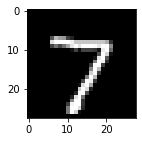

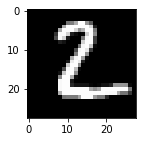

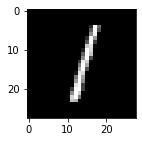

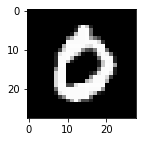

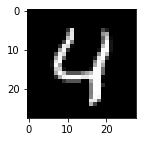

In [6]:
import matplotlib.pyplot as plt
def viewImage(x):
    plt.figure(figsize=(2,2))
    plt.imshow(x, interpolation='nearest', cmap='gray')
    plt.show()
    
viewImage(test_images[0])
viewImage(test_images[1])
viewImage(test_images[2])
viewImage(test_images[3])
viewImage(test_images[4])

and let's look at the associated labels:

In [7]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Well, that is encouraging -- The images and the labels match!

### Workflow


Our workflow will be as follow: 

1. we will create a neural network containing a fully connected hidden layer.
2. we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. 
3. we will ask the network to produce predictions for `test_images`
4. we will verify if these predictions match the labels from `test_labels`.

#### Let's build our network.

In [8]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.


### Explained yet again
Okay, let's look at each of the above code lines

     network = models.Sequential()
     
My English translation of this is "We want a model with a linear (sequential) stack of layers."  The model initially has zero layers.

Next we have...

     network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
     
Here we add a layer to the model. `Dense` means that every input node (since this is the first layer, this means every input feature) is connected to every node in this layer.  The `512` means how many node we want in this layer -- 512. `activation=relu` defines the activation function. We will talk about this later. Finally we define what the shape of the input is. Since every image is 28 x 28, our input shape is 28 * 28 or 784 (and yes, we could have written `input_shape=(784, )`.

Next,

     network.add(layers.Dense(10, activation='softmax'))
     
Here we add another layer. Again, `Dense` means that each node of the 512 nodes of the pervious layer are connected to the 10 of this layer. The `10` means there are 10 nodes. 

#### Compiling the model.
To make our network ready for training, we need to pick three more things, as part of a compilation step:

* An **optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* A **loss function**: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

Keras makes this compilation step easy:

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Why did we select categorical crossentropy as the loss function? From the Tensorflow documentation:

> Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

Note that the documentation says that we need to one_hot encode the labels. You probably already know this but that means if we are labeling pictures of dogs, cats, squirrel and moose and our test_labels look like

picture | label
:---:   | :---
1.  | dog
2. | dog
3. | cat
4. | squirel
5. | cat
6. | moose

We will one_hot encode this resulting in 


picture | dog | cat | squirrel | moose
:---: | :----: |:--: | :---: | :---:
 1.     | 1 | 0 | 0 | 0
 2. | 1 | 0| 0 | 0
 3. | 0 | 1 | 0 | 0
 4. | 0 | 0 | 1 | 0
 5. | 0 | 1 |0 | 0
 6. | 0|0|0|1

And again, the `metrics=['accuracy']` line means that we are calculating the percentage of predicted values that match with actual values.


### Preprocessing the data
Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In other words, each image in our original data was a 28x28 array of integers ranging from 0 to 255. We are going to transform the integers 0-255 to a float between 0 and 1. In addition we are going to flatten each image array to look like

```
[0, 1, 2, 3, 4, 5 ... 784 ]
```


In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#### Here's a question:
Why are we dividing each pixel by 255? What did the original number represent?

#### Encode the labels
We also need to categorically encode the labels:

### Solution

The pixel values can range from 0 to 256. Each number represents a color code. When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
To reduce this we can normalize the values to range from 0 to 1.In this way, the numbers will be small and the computation becomes easier and faster.

As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

So the original number represent the color code of the number.


In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### What does the first test label look like? (print it out)
And what is this called?

In [12]:
print(test_labels)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Training our first deep learning model

We are now ready to train our network, which, unsurprisingly, in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2564 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1046 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0689 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0502 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0376 - accuracy: 0.9885


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9766


In [15]:
print('test_acc:', test_acc)

test_acc: 0.9765999913215637



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 


### Accuracy with 7 epochs
What is the accuracy on our test data if we use 7 epochs?  You will need to build, compile, and fit a new model.



### Solution
The accuracy on our test data when we have used the 7 epochs is 98.16 percentages. 

In [16]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 2/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 3/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 4/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0135 - accuracy: 0.9959
Epoch 5/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0103 - accuracy: 0.9972
Epoch 6/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0079 - accuracy: 0.9980
Epoch 7/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0067 - accuracy: 0.9980


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9825


In [18]:
print('test_acc:', test_acc)

test_acc: 0.9825000166893005


### Accuracy without training
What is the accuracy on our test data using our network before we do any training (before `fit`)? You will need to build, compile, and fit a new model.

### Training
As you can see from your above experiment, before we fit the model the accuracy was not very good. Before training, the weight are set at random (not exactly, but let's keep it simple for now). 




![](http://zacharski.org/files/courses/cs419/deepLearning.png)

When we were fitting the model:

     network.fit(train_images, train_labels, epochs=5, batch_size=128)
    
we processed 128 images at a time (this is called batch_size). Everytime we processed the images in that batch we calculated the loss and adjusted the weights to improve the network's  performance. Each time we go through the entire dataset we call it an epoch. So in our initial training, we went through the dataset 5 times.  Once we have gone through the data 5 times we stop and now we have a trained neural network. 'Trained' simply means that we have a network with the weight adjusted to reduce loss.

#### Epochs 
Again, epochs are how many times we go through the training data. You may wonder, are more epochs always better. Stop for a moment and ponder this. 

* .
* .
* .
* .
If you need a clue let me mention bias and variance. 

In the next notebook we will be displaying both the accuracy on the training data and the accuracy on the validation error.  If at some point you see the training data accuracy still going gradually down, but the validation error going up. You may be overfitting your data.


# You Try  - Fashion.

### finally some xp

As a small first step try out the FashionMNIST dataset that we've seen before.

![](http://zacharski.org/files/courses/cs419/clothes-sprite.png)
![](http://zacharski.org/files/courses/cs419/clothing.gif)


The dataset consists of small 28x28 grayscale image icons of different articles of clothing. There are 60,000 images in the training set and 10,000 in the test set. Each image has an associated label from a list of 10:


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



#### The files

* Training set: [clothes_train.csv](http://zacharski.org/files/courses/cs419/clothes_train.csv)
* Test set: [clothing_test.csv](http://zacharski.org/files/courses/cs419/cTest.csv) Note: Don't use the test set for training.

Can you create a network with one hidden layer similar to the example above and train it?


In [45]:
import tensorflow as tf                           # Importing tensorflow module for building the ann
from matplotlib import pyplot                     # Importing the matplot library for ploting the images
from keras.datasets import fashion_mnist          # Importing the cloths dataset from the keras
from sklearn.preprocessing import LabelEncoder    # importing the labelencoder for label encoding
from sklearn.preprocessing import StandardScaler  # Importing the standard scaler
import pandas as pd                               # Import pandas module for reading the dataset
import numpy as np                                # Importing the numpy module for array manipulation
from matplotlib import pyplot as plt              # Importing the pyplot module for plotting the graph

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


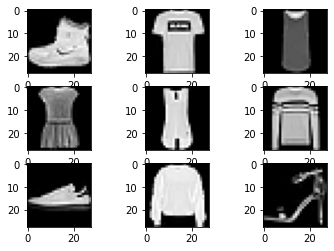

In [52]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()        # load dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))           # summarize loaded dataset
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):                                                  # plot first few images
	pyplot.subplot(330 + 1 + i)                                       # define subplot
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))            # plot raw pixel data
pyplot.show()                                                       # show the figure

In [53]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    # class names are not included, need to create them to plot the images 

In [54]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


In [55]:
train_images = train_images / 255.0                  # scale the values to a range of 0 to 1 of both data sets
test_images = test_images / 255.0

In [56]:
model = keras.Sequential([                                                          # Model a simple 3-layer neural network
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5180 - accuracy: 0.8178 - val_loss: 0.4243 - val_accuracy: 0.8512
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3910 - accuracy: 0.8589 - val_loss: 0.3948 - val_accuracy: 0.8569
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3492 - accuracy: 0.8741 - val_loss: 0.3562 - val_accuracy: 0.8723
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3233 - accuracy: 0.8820 - val_loss: 0.3538 - val_accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3039 - accuracy: 0.8884 - val_loss: 0.3871 - val_accuracy: 0.8613


### What is its accuracy on the test data?

### Solution
The accurcy on the test data is nearly 87 percentange. which is normally good.

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8515


### Q8 a two hidden layer network in Keras.
Can you construct and train a new network that has two hidden layers 
(as before, the first layer can have 512 neurons - the second should have 256)? What is its accuracy on the test data? 

### Solution
Yes, we can construct the hidden layers also. Below we developed the hidden layers solutions

In [60]:
label_encoder = LabelEncoder()            # Calling the Labelencoder
scaler = StandardScaler()

In [61]:
ann = keras.Sequential([                                                # Model a simple artificial neural network
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.softmax)
])
ann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
Total params: 533,248
Trainable params: 533,248
Non-trainable params: 0
_________________________________________________________________


In [62]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
ann.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5174 - accuracy: 0.8214 - val_loss: 0.4173 - val_accuracy: 0.8487
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3753 - accuracy: 0.8631 - val_loss: 0.3672 - val_accuracy: 0.8698
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3337 - accuracy: 0.8777 - val_loss: 0.3423 - val_accuracy: 0.8777
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3112 - accuracy: 0.8839 - val_loss: 0.3321 - val_accuracy: 0.8790
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2850 - accuracy: 0.8947 - val_loss: 0.3330 - val_accuracy: 0.8799


In [64]:
test_loss, test_acc = ann.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3531 - accuracy: 0.8737


# Volcanoes on Venus 

![](https://upload.wikimedia.org/wikipedia/commons/1/16/Maat_Mons_on_Venus.jpg)


### First, no one has been to Venus
I felt I needed to say that upfront because we don't really know if there are volcanoes on Venus. An analysis of the data by experts is not 100% accurate so the labels are the experts best guess.

The images are from NASA's Magellan spacecraft which was launched on May 4, 1989 and made it to Venus on August 10, 1990. Magellan mapped the surface of Venus using synthetic aperture radar. Some images have black blocks in them caused by either problems with Magellan or with communication back to earth. 

### The data
The images are 110x110 grayscale pixels. The value of each pixel ranges from 0 to 255. Your task it to build a classifier that will predict whether a volcano is present in the image or not.

#### The files

* Training images: [volcanoes_train_images.csv](http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv)
* Training labels: [volcanoes_train_labels.csv](http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv) 
* Testing images: [volcanoes_test_images.csv](http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv)
* Testing labels: [volcanoes_test_labels.csv](http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv) 




## Tasks

There are 5 tasks

1. A simple task: Can you display a few of the images from the dataset?
2. Build a model with one hidden layer. Train it for 2 epochs. What is it's accuracy?
3. Build a model with one hidden layer. Train it for 10 epochs. What is it's accuracy? 
4. Does increasing the epochs beyond 10 improve accuracy?
5. Build a model with 2 hidden layers and test.

In [65]:
train_images1 = pd.read_csv('/content/train_images.csv')   # Reading the dataset file
train_labels1 = pd.read_csv('/content/train_labels.csv')
test_images1  = pd.read_csv('/content/test_images.csv')
test_labels1  = pd.read_csv('/content/test_labels.csv')


In [66]:
train_images1.shape

(345, 12100)

In [67]:
print('Train: X=%s, y=%s' % (train_images1.shape, train_labels1.shape))   

Train: X=(345, 12100), y=(7000, 4)


In [68]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1                                   # shifting index
    X.sort_index(inplace=True)                              # sorting the index
XFix(train_images1)
XFix(test_images1)

In [69]:
y_train_copy = train_labels1.copy(deep=True)
X_train_copy = train_images1.copy(deep=True)

In [70]:
X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

In [47]:
y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
y_train_copy.loc[y_train_copy["Type"] == 2, 'Type'] = "Probably Volcano"
y_train_copy.loc[y_train_copy["Type"] == 3, 'Type'] = "Possibly Volcano"
y_train_copy.loc[y_train_copy["Type"] == 4, 'Type'] = "Only Pit is Visible"
y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
y_train_copy.loc[y_train_copy["Volcano?"] == 1, 'Volcano?'] = "Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 1, 'Number Volcanoes'] = "One Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 2, 'Number Volcanoes'] = "Two Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 3, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 4, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 5, 'Number Volcanoes'] = "Three or More Volcano"

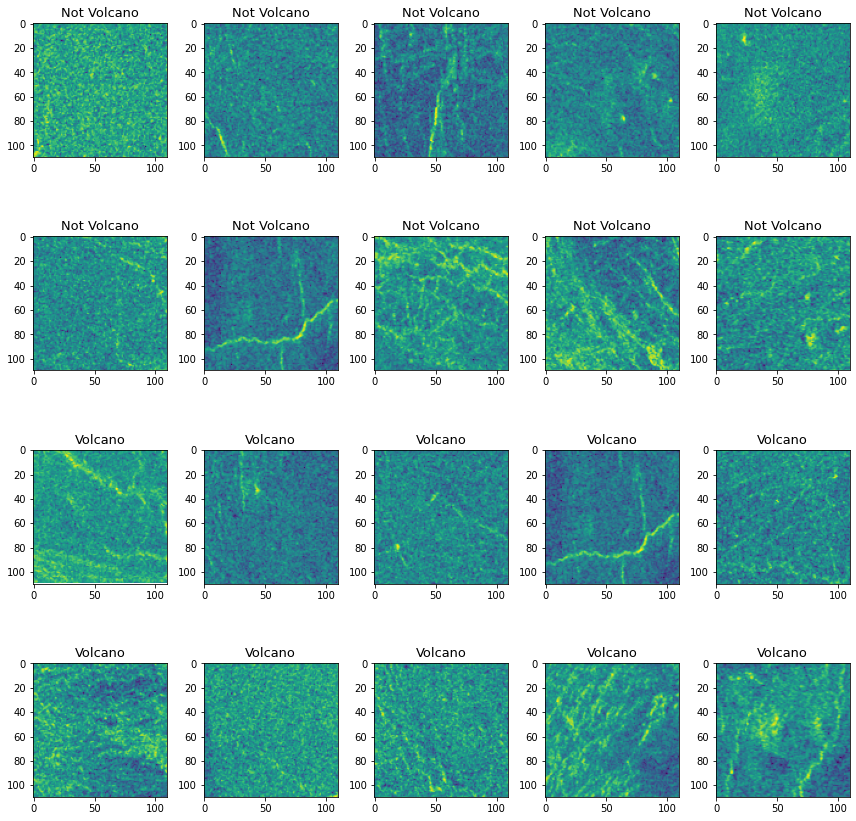

In [48]:
def draw_images(feature):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    f, ax = plt.subplots(len(featureTypes)*2, 5, figsize=(12,6*len(featureTypes)))
    for i in range(len(featureTypes)*2):
        typ = featureTypes[int(i/2)]
        sample = y_train_copy[y_train_copy[feature]==typ].sample(5)
        for j in range(5):
            imageIndex = sample.iloc[j].name
            image = X_train_copy[imageIndex]
            ax[i, j].imshow(image, resample=True)
            ax[i, j].set_title(typ, fontsize=13)
    plt.tight_layout()
    plt.show()
draw_images("Volcano?")    

In [50]:
 network1 = models.Sequential()

In [51]:
network1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network1.add(layers.Dense(10, activation='softmax'))

In [72]:
network1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
label_encoder = LabelEncoder()            # Calling the Labelencoder
scaler = StandardScaler()

In [78]:
network1 = keras.Sequential([                               # Model a simple artificial neural network
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.softmax)
])
network1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
Total params: 533,248
Trainable params: 533,248
Non-trainable params: 0
_________________________________________________________________


#### Remix
Remix by Ron Zacharski. Orginal Python notebook by François Chollet

### MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.